<a href="https://colab.research.google.com/github/LeeSeungYun1020/Introduction_To_Data_Science/blob/master/classroom/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-means clustering

## Simple implementation in 2D

클러스터링을 위한 테스트 데이터 세트를 만들고 클러스터링 해본다.
1. 데이터 세트 만들기
2. 중심값 찾기
3. 클러스터링 결과 시각화

In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
center = np.array([[1, 1], [5, 5], [8, 1]])
data = np.random.randn(200, 3, 2) + center
print(data.shape)
t_data = np.concatenate((data[:,0,:], data[:,1,:], data[:,2,:]))
t_data.shape

(200, 3, 2)


(600, 2)

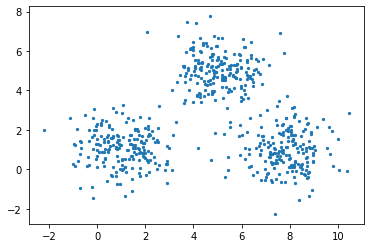

In [41]:
plt.scatter(t_data[:,0], t_data[:,1], s= 5)
plt.show()

In [56]:
k = 3                             # 클러스터 수
n = data.shape[0] * data.shape[1] # 데이터 수 (점의 수)
c = data.shape[2]                 # 특성 수 (여기서는 2차원)

print("k =", k)
print("n =", n)
print("c =", c)

mean = np.mean(t_data, axis=0)
print("mean =", mean)
std = np.std(t_data, axis=0)
print("std =", std)

k = 3
n = 600
c = 2
mean = [4.63455481 2.36063802]
std = [2.93904035 2.09742006]


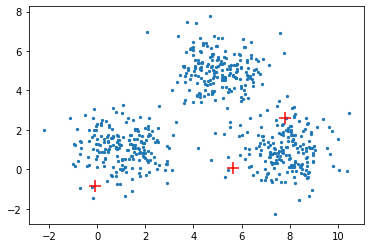

In [57]:
centroids = np.random.randn(k, c) * std + mean
plt.scatter(t_data[:,0], t_data[:,1], s= 5)
plt.scatter(centroids[:,0], centroids[:,1], s=150, c="r", marker="+")
plt.show()

In [58]:
clusters = np.zeros(n)
distances = np.zeros((n, k))
error = np.linalg.norm(new_cent - old_cent)
iteration_counter = 0

old_cent = np.zeros(centroids.shape)
new_cent = deepcopy(centroids)

In [59]:
while error != 0:
  for i in range(k):
    distances[:, i] = np.linalg.norm(t_data - new_cent[i], axis = 1)

  clusters = np.argmin(distances, axis = 1)
  old_cent = deepcopy(new_cent)

  for i in range(k):
    new_cent[i] = np.mean(t_data[clusters == i], axis=0)

  error = np.linalg.norm(new_cent - old_cent)
  iteration_counter += 1

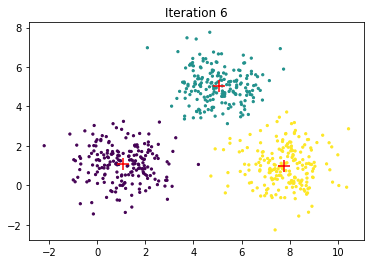

In [60]:
plt.scatter(t_data[:,0], t_data[:,1], s=5, c=clusters)
plt.scatter(new_cent[:,0], new_cent[:,1], marker='+', c='r', s=150)
plt.title(f"Iteration {iteration_counter}")
plt.show()

## Scikit-learn KMean

In [29]:
from sklearn.cluster import KMeans

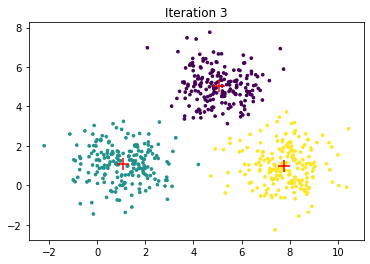

In [62]:
model = KMeans(3)
model.fit(t_data)

plt.scatter(t_data[:,0], t_data[:,1], s=7, c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='+', c='r', s=150)
plt.title(f'Iteration {model.n_iter_}')
plt.show()

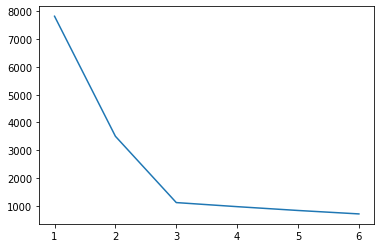

In [64]:
inertia = []
for k in range(1, 7):
  model = KMeans(k, random_state=33)
  model.fit(t_data)
  inertia.append(model.inertia_)
plt.plot(range(1, 7), inertia)
plt.show()

In [65]:
from sklearn import metrics

model = KMeans(3, random_state=33)
model.fit(t_data)
metrics.silhouette_score(t_data, model.labels_)

0.6594996113141061

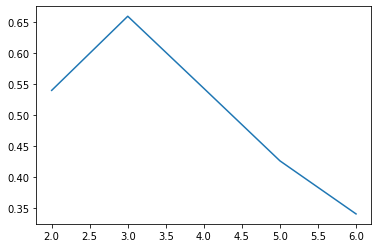

In [68]:
sc = []
for k in range(2, 7):
  model = KMeans(k, random_state=33)
  model.fit(t_data)
  sc.append(metrics.silhouette_score(t_data, model.labels_))

plt.plot(range(2, 7), sc)
plt.show()